# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
# Your code here.
import pandas as pd
import numpy as np
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

In [2]:
# Your code here.
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

plt.scatter(x="Age", y="Tardies", data = student_data, alpha=0.5)
plt.show()

<Figure size 640x480 with 1 Axes>

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [3]:
# Your response here. 
"""
It seems that the intuition is confirmed... the trend of the values shows that it is possible 
that: the older the students the lower the number of times he/she is late for class.
"""

'\nIt seems that the intuition is confirmed... the trend of the values shows that it is possible \nthat: the older the students the lower the number of times he/she is late for class.\n'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
# Your response here.
#correlation:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [5]:
#covariance:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [6]:
"""
The difference between the 2 is that:
Covariance measures how much and in which direction the 2 variables deviate from their
respective means in absolute terms, when considered together. Thus, it can assume any value,
positive or negative, depending if the 2 variables drift from the mean in the same or in opposite
directions.

Correlation instead is the ratio beteween the covariance of the 2 variables and their
respective standard deviations. Thus, it measures more intuitively how much the 2 variables 
move in the same/opposite direction if positive/negative. The scale goes then from -1 to 1
inclusive, where 0 indicates that there is no correlation between the 2.

In this specific case they tell us that there is actually a significantly negative correlation
between Age and Tardies and they drift from their respective means in opposite directions by 45.
"""

'\nThe difference between the 2 is that:\nCovariance measures how much and in which direction the 2 variables deviate from their\nrespective means in absolute terms, when considered together. Thus, it can assume any value,\npositive or negative, depending if the 2 variables drift from the mean in the same or in opposite\ndirections.\n\nCorrelation instead is the ratio beteween the covariance of the 2 variables and their\nrespective standard deviations. Thus, it measures more intuitively how much the 2 variables \nmove in the same/opposite direction if positive/negative. The scale goes then from -1 to 1\ninclusive, where 0 indicates that there is no correlation between the 2.\n\nIn this specific case they tell us that there is actually a significantly negative correlation\nbetween Age and Tardies and they drift from their respective means in opposite directions by 45.\n'

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [7]:
# Your response here.
from scipy import stats
from sklearn.linear_model import LinearRegression

Y = np.array([i for i in student_data["Tardies"]])
X = np.array([i for i in student_data["Age"]]).reshape((-1,1))
lm = LinearRegression()
model = lm.fit(X,Y)

print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_)

predictions  = lm.predict(X)

print("Predictions: ", lm.predict(X))

"""
We are using a linear regression model. Predicitons is the oucome variables.
"""

Intercept:  12.888803363135768
Coef:  [-0.24282077]
Predictions:  [ 8.76085026  0.50494405  6.33264255  7.78956717  4.14725561  1.23340636
  8.27520872  6.57546332 -0.22351827  5.60418024]


'\nWe are using a linear regression model. Predicitons is the oucome variables.\n'

Plot your regression model on your scatter plot.

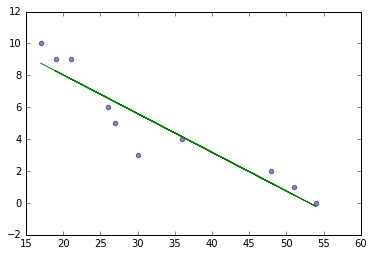

In [8]:
# Your code here.
plt.scatter(x="Age", y="Tardies", data = student_data, alpha=0.5)
plt.plot(student_data["Age"], predictions, color="green")
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [9]:
# Your response here. 
"""
We can conclude that, in absence of other information, seems that Age could be used to predict 
the level of Tardiness of a student. More specifically, for every year a student is older he/she
is supposed to be less late by almost 1/4 of the times (slope), starting from an average of 
12 times from 17 years old onwards. However, this conclusions are not reliable at all:
The data set over which the fitting of the model has been performed is too small to generalize
conclusions.
Second, despite actually displyaing a statistically relevant negative correlation, the relationship
beteween Age and Tardies could also be ifluenced by variables not examined, as for example the 
commuting time required, if the student is also working or not etc. 
"""

'\nWe can conclude that, in absence of other information, seems that Age could be used to predict \nthe level of Tardiness of a student. More specifically, for every year a student is older he/she\nis supposed to be less late by almost 1/4 of the times (slope), starting from an average of \n12 times from 17 years old onwards. However, this conclusions are not reliable at all:\nThe data set over which the fitting of the model has been performed is too small to generalize\nconclusions.\nSecond, despite actually displyaing a statistically relevant negative correlation, the relationship\nbeteween Age and Tardies could also be ifluenced by variables not examined, as for example the \ncommuting time required, if the student is also working or not etc. \n'

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [10]:
# Import any libraries you may need & the data
ds = pd.read_csv("/home/mattia/Desktop/Ironhack/MODULE-1/WEEK-2/vehicles/vehicles.csv")
ds.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [11]:
# Your response here. 
ind_var = ["Year","Cylinders","Fuel Barrels/Year","Combined MPG","Fuel Cost/Year"] 

for col in ind_var:
    corr = ds["CO2 Emission Grams/Mile"].corr(ds[col], method="pearson")
    print(col, corr)

#Pearson correlation because some vairables are non-linear.

"""
According to the correlations analysis, it appears that all the variables examined apart for "Year"
can be potentially useful in prediciting the level of CO2 emissions. in particular
"Fuel Barrels/Year"
"""



Year -0.22229960295054227
Cylinders 0.7523925537297491
Fuel Barrels/Year 0.9861886621428733
Combined MPG -0.9262290389336438
Fuel Cost/Year 0.9308651512201842


'\nAccording to the correlations analysis, it appears that all the variables examined apart for "Year"\ncan be potentially useful in prediciting the level of CO2 emissions. in particular\n"Fuel Barrels/Year"\n'

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [12]:
# Your response here. 
Y = ds["CO2 Emission Grams/Mile"]
X = ds[[i for i in ind_var]] #Array of independent variables
lm = LinearRegression()
model = lm.fit(X,Y) 

b = lm.intercept_ #intercept value
A = lm.coef_ # Array of coefficients

Yp = lm.predict(X) # Array of predicted values of Y based on fitting

"""
The model is a mutivariate linear regression model.
"""


'\nThe model is a mutivariate linear regression model.\n'

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [13]:
print("Intercept: ", b)
print("Ind Variables: ", ind_var)
print("Coefficients : ", A)
print("Predictions: ", Yp)

"""
The 3 most important variables of the model are (in decreasing order): Fuel Barrels/Year,
Combined MPG and Cylinders. The effect of the other 2 is negligible. The reason is in the value of
the coefficient for each of them: a value close to 0, means that the variable is not contributing
in a significant way in explaining the dependent variable (Y).
According to the model, for example, we could expect that if a vehcile consumes 1 more 
Barrel of Fuel/Year, the relative level of CO2 emissions will increase by 19 Grams/mile. 
The model has been fit on a relevant data set (35000 observations), thus its conclusions could be
generalized with decent level of confidence from this point of view. However, further analysis
would be required to explore the relationship between the explanatory variables, as Combined MPG,
Cylider and Fuel Barrel/Year might be dependant from one-another.
"""

Intercept:  769.8882836465666
Ind Variables:  ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']
Coefficients :  [-0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948]
Predictions:  [522.03038361 671.00105318 552.68495072 ... 230.01342446 229.69280773
 239.33283552]


'\nThe 3 most important variables of the model are (in decreasing order): Fuel Barrels/Year,\nCombined MPG and Cylinders. The effect of the other 2 is negligible. The reason is in the value of\nthe coefficient for each of them: a value close to 0, means that the variable is not contributing\nin a significant way in explaining the dependent variable (Y).\nAccording to the model, for example, we could expect that if a vehcile consumes 1 more \nBarrel of Fuel/Year, the relative level of CO2 emissions will increase by 19 Grams/mile. \nThe model has been fit on a relevant data set (35000 observations), thus its conclusions could be\ngeneralized with decent level of confidence from this point of view. However, further analysis\nwould be required to explore the relationship between the explanatory variables, as Combined MPG,\nCylider and Fuel Barrel/Year might be dependant from one-another.\n'

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [14]:
# Your code here.
party = pd.DataFrame({'Invt': [1,3,4,6,8,9,11,14], 'Att': [1,2,4,4,5,7,8,13]})
party

,Invt,Att
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

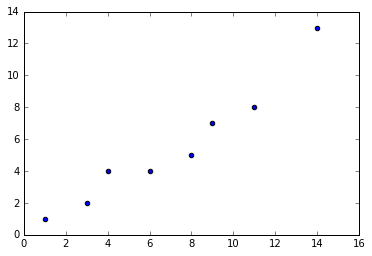

In [15]:
# Your code here.
plt.scatter(x="Invt",y="Att",data=party)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [16]:
# Your response here. 
X = party['Invt']
Y = party['Att']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

stats.linregress(X, Y)


print("Intercept: ", intercept)
print("Slope: ", slope)
print("Correlation: ", r_value)
print("Std Error: ", std_err)

"""
According to the plot above, the values appear to be positively correlated. 
This is confirmed by the balue of the correlation in the regression. The regression also
has a low standard error, which makes it more reliable.
"""

Intercept:  -0.43939393939393945
Slope:  0.8484848484848485
Correlation:  0.9652303546573691
Std Error:  0.09380896778286217


'\nAccording to the plot above, the values appear to be positively correlated. \nThis is confirmed by the balue of the correlation in the regression. The regression also\nhas a low standard error, which makes it more reliable.\n'

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [32]:
# Your response here. 
# Removing values of X above Q3 +1.5 * IQR or below Q1 - 1.5 * IQR

IQR = party["Invt"].quantile(0.75)-party["Invt"].quantile(0.25)

Xnew = [ i for i in party["Invt"] if (party["Invt"].quantile(0.25) - 1.5*IQR) < i < (party["Invt"].quantile(0.75) + 1.5*IQR)]
Xnew = np.asarray(Xnew)[:-1] #in case we still want to consider 14 as outlier
Xnew

array([ 1,  3,  4,  6,  8,  9, 11])

In [36]:
X = Xnew
Y = party['Att'][:-1]# in case we still want to consider 14 as outlier
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

predictions= slope*X + intercept

print("Intercept: ", intercept)
print("Slope: ", slope)
print("Correlation: ", r_value)
print("Std Error: ", std_err)
print("PredictionsY: ", predictions)

Intercept:  0.32330827067669166
Slope:  0.6842105263157895
Correlation:  0.971278116825086
Std Error:  0.07496206665031294
PredictionsY:  [1.0075188  2.37593985 3.06015038 4.42857143 5.79699248 6.48120301
 7.84962406]


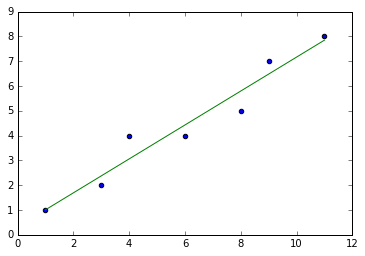

In [39]:
plt.scatter(x="Invt",y="Att",data=party[:-1])
plt.plot(party["Invt"][:-1], predictions, color="green")
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [20]:
# Your response here. 
"""
There are actually no problematic points according to Outliers measurement test. However,
excluding the last row, the data appear better approximated by the linear model than before.
"""